# Movie Recommendation System

In [425]:
pip install scikit-learn==1.6.1

^C
Note: you may need to restart the kernel to use updated packages.


In [426]:
!pip install -U sentence-transformers


In [ ]:
pip install scikit-surprise

In [ ]:
pip install sentence-transformers


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import numpy as np
import pandas as pd
import asyncio
import aiohttp
from tqdm.notebook import tqdm
import nest_asyncio
import glob
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import random
import joblib
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import numpy as np
import pandas as pd
import aiohttp
import asyncio
from tqdm.asyncio import tqdm
import traceback
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

In [2]:
# Apply for notebook environments
nest_asyncio.apply()


In [3]:

# Set your desired directory path
save_dir = "C:\\Users\\haris\\OneDrive\\Desktop\\final_project"


# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)


In [4]:
API_KEY = "35c2764e71939361d5eb59cfe3197b52"

In [5]:
print(os.getcwd())

C:\Users\haris\OneDrive\Desktop\Final_project_final\final_project


In [6]:
dfl = pd.read_csv('links.csv')

In [7]:
dfm = pd.read_csv('movies.csv')

In [8]:
dfr = pd.read_csv('ratings.csv')

In [9]:
dft = pd.read_csv('tags.csv')

In [10]:
dfr.info()
dft.info()
dfl.info()
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000072 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  87585 non-null  int64  
 1   imdbId   87585 non-null  int64  
 2   tmdbId   87461 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB
<class 'pandas.core.frame.DataFrame'>
Ran

In [11]:
# Merging all datasets using movieId as the anchor
df = dfl.merge(dfm, on='movieId', how='outer') \
               .merge(dfr, on='movieId', how='outer') \
               .merge(dft, on=['movieId', 'userId', 'timestamp'], how='outer')

In [12]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,2.5,1.169265e+09,NaN
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,3.0,8.500851e+08,NaN
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.0,1.027306e+09,NaN
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,9.747045e+08,NaN
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20.0,5.0,1.553184e+09,NaN
...,...,...,...,...,...,...,...,...,...
34003306,90645,NaN,NaN,NaN,NaN,162279.0,NaN,1.320818e+09,Rafe Spall
34003307,91079,NaN,NaN,NaN,NaN,162279.0,NaN,1.322337e+09,Anton Yelchin
34003308,91079,NaN,NaN,NaN,NaN,162279.0,NaN,1.322337e+09,Felicity Jones
34003309,91658,NaN,NaN,NaN,NaN,162279.0,NaN,1.325828e+09,Rooney Mara


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34003311 entries, 0 to 34003310
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   imdbId     float64
 2   tmdbId     float64
 3   title      object 
 4   genres     object 
 5   userId     float64
 6   rating     float64
 7   timestamp  float64
 8   tag        object 
dtypes: float64(5), int64(1), object(3)
memory usage: 2.3+ GB


In [14]:
missing_values = df.isnull().sum()
print(missing_values)

movieId             0
imdbId        1999518
tmdbId        2004246
title         1999518
genres        1999518
userId           3153
rating        2002671
timestamp        3153
tag          32003256
dtype: int64


In [15]:
# Removing rows with 3 or more missing values
df = df.dropna(thresh=df.shape[1] - 2)

In [16]:
missing_values2 = df.isnull().sum()
print(missing_values2)

movieId             0
imdbId              0
tmdbId           4726
title               0
genres              0
userId              0
rating              0
timestamp           0
tag          32000086
dtype: int64


In [17]:
df = df.drop(columns='tag')

In [18]:
df = df.dropna(subset=['tmdbId'])

In [19]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,2.5,1.169265e+09
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,3.0,8.500851e+08
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.0,1.027306e+09
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,9.747045e+08
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20.0,5.0,1.553184e+09
...,...,...,...,...,...,...,...,...
32003788,292731,26812510.0,1032473.0,The Monroy Affaire (2022),Drama,50685.0,4.0,1.697075e+09
32003789,292737,14907358.0,986674.0,Shelter in Solitude (2023),Comedy|Drama,165364.0,1.5,1.697146e+09
32003790,292753,12388280.0,948139.0,Orca (2023),Drama,150812.0,4.0,1.697141e+09
32003791,292755,64027.0,182776.0,The Angry Breed (1968),Drama,91097.0,1.0,1.697145e+09


In [20]:
# Count how many times each userId appears
user_counts = df['userId'].value_counts()

top_10_most = user_counts.head(10)

top_10_least = user_counts.tail(10)

print("Top 10 users who rated the most:\n")
print(top_10_most)

print("\nTop 10 users who rated the least:\n")
print(top_10_least)


Top 10 users who rated the most:

userId
175325.0    33328
17035.0      9578
55653.0      9172
123465.0     9042
171795.0     9014
10202.0      7747
198515.0     7590
49305.0      7482
22744.0      7372
7858.0       7320
Name: count, dtype: int64

Top 10 users who rated the least:

userId
13863.0     20
162821.0    20
192201.0    19
51699.0     19
99999.0     19
191277.0    19
121187.0    19
160346.0    19
67751.0     19
104351.0    19
Name: count, dtype: int64


In [21]:
df.describe()

,movieId,imdbId,tmdbId,userId,rating,timestamp
count,3.199591e+07,3.199591e+07,3.199591e+07,3.199591e+07,3.199591e+07,3.199591e+07
mean,2.932045e+04,5.930045e+05,3.881808e+04,1.002783e+05,3.540418e+00,1.275257e+09
std,5.096014e+04,1.368973e+06,1.021859e+05,5.794871e+04,1.058965e+00,2.561690e+08
min,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.233000e+03,1.010040e+05,7.140000e+02,5.005400e+04,3.000000e+00,1.051015e+09
50%,3.452000e+03,1.205770e+05,8.321000e+03,1.002970e+05,3.500000e+00,1.272667e+09
75%,4.419900e+04,3.816810e+05,1.416100e+04,1.504500e+05,4.000000e+00,1.503170e+09
max,2.927570e+05,2.908110e+07,1.186337e+06,2.009480e+05,5.000000e+00,1.697164e+09


In [22]:
print("Unique TMDB IDs in df:", df['tmdbId'].nunique())

Unique TMDB IDs in df: 84275


In [23]:
print("Unique user IDs in df:", df['userId'].nunique())

Unique user IDs in df: 200948


In [24]:
# Filter by year
df = df[df['title'].str.extract(r'\((\d{4})\)').astype(float)[0] > 1990]

In [25]:
# Remove users with no rating variance
user_var = df.groupby('userId')['rating'].std()
users_with_variance = user_var[user_var > 0].index
df = df[df['userId'].isin(users_with_variance)]

In [26]:
# Filter users with a reasonable number of ratings
user_rating_counts = df['userId'].value_counts()
filtered_user_ids = user_rating_counts[
    (user_rating_counts >= 30) &
    (user_rating_counts <= user_rating_counts.quantile(0.99))
].index
df = df[df['userId'].isin(filtered_user_ids)]

In [27]:
# Filter movies with enough ratings
movie_counts = df['movieId'].value_counts()
eligible_movies = movie_counts[movie_counts >= 50].index
df = df[df['movieId'].isin(eligible_movies)]

In [28]:
# Recalculate after previous filtering
user_counts = df['userId'].value_counts()
movie_counts = df['movieId'].value_counts()

In [29]:
# Choose users and movies that survived and have enough interactions
valid_users = user_counts[user_counts >= 30].index[:15000] 
valid_movies = movie_counts[movie_counts >= 50].index[:15000]

In [30]:
df = df[df['userId'].isin(valid_users) & df['movieId'].isin(valid_movies)]

In [31]:
# 7. Now sample exactly 10k users and 10k movies from the remaining set
final_users = df['userId'].unique()
final_movies = df['movieId'].unique()

In [32]:
print("Available movies:", len(final_movies))
print("Available users:", len(final_users))


Available movies: 9020
Available users: 15000


In [33]:
np.random.seed(42)
sampled_user_ids = np.random.choice(final_users, size=10000, replace=False)
sampled_movie_ids = np.random.choice(final_movies, size=9020, replace=False)

In [34]:
df_sample = df[
    df['userId'].isin(sampled_user_ids) &
    df['movieId'].isin(sampled_movie_ids)
].copy()

In [35]:
# limit per-movie ratings
df_sample = (
    df_sample.groupby('movieId', group_keys=False)
    .apply(lambda x: x.sample(n=min(1000, len(x)), random_state=42))
    .reset_index(drop=True)
)

In [36]:
print("Unique movies in df_sample:", df_sample['tmdbId'].nunique())
print("Unique user IDs in df_sample:", df_sample['userId'].nunique())
print("Total ratings in df_sample:", len(df_sample))

Unique movies in df_sample: 9015
Unique user IDs in df_sample: 10000
Total ratings in df_sample: 2785197


In [37]:
# Save df_sample
df_sample_path = os.path.join(save_dir, "df_sample.csv")
df_sample.to_csv(df_sample_path, index=False)


In [38]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36641.0,1.5,1.165810e+09
1,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,70379.0,4.0,9.759794e+08
2,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,88400.0,3.5,1.545170e+09
3,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,171266.0,4.0,1.483595e+09
4,1,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,77024.0,4.5,1.341102e+09
...,...,...,...,...,...,...,...,...
2785192,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem (2...,Action|Animation|Children|Comedy|Sci-Fi,41638.0,4.0,1.695693e+09
2785193,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem (2...,Action|Animation|Children|Comedy|Sci-Fi,60730.0,4.0,1.696293e+09
2785194,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem (2...,Action|Animation|Children|Comedy|Sci-Fi,106430.0,5.0,1.694894e+09
2785195,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem (2...,Action|Animation|Children|Comedy|Sci-Fi,157539.0,3.0,1.693911e+09


In [39]:
import pandas as pd

# Using regex to extract the year and remove it from the title in one go
df_sample['year'] = df_sample['title'].str.extract(r'\((\d{4})\)', expand=False)
df_sample['title'] = df_sample['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

print(df_sample)


         movieId     imdbId    tmdbId  \
0              1   114709.0     862.0   
1              1   114709.0     862.0   
2              1   114709.0     862.0   
3              1   114709.0     862.0   
4              1   114709.0     862.0   
...          ...        ...       ...   
2785192   289253  8589698.0  614930.0   
2785193   289253  8589698.0  614930.0   
2785194   289253  8589698.0  614930.0   
2785195   289253  8589698.0  614930.0   
2785196   289253  8589698.0  614930.0   

                                               title  \
0                                          Toy Story   
1                                          Toy Story   
2                                          Toy Story   
3                                          Toy Story   
4                                          Toy Story   
...                                              ...   
2785192  Teenage Mutant Ninja Turtles: Mutant Mayhem   
2785193  Teenage Mutant Ninja Turtles: Mutant Mayhem   
278

In [40]:
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,year
0,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,36641.0,1.5,1.165810e+09,1995
1,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,70379.0,4.0,9.759794e+08,1995
2,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,88400.0,3.5,1.545170e+09,1995
3,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,171266.0,4.0,1.483595e+09,1995
4,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,77024.0,4.5,1.341102e+09,1995
...,...,...,...,...,...,...,...,...,...
2785192,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,41638.0,4.0,1.695693e+09,2023
2785193,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,60730.0,4.0,1.696293e+09,2023
2785194,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,106430.0,5.0,1.694894e+09,2023
2785195,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,157539.0,3.0,1.693911e+09,2023


In [41]:
# Converting the timestamp column to datetime format
df_sample['timestamp'] = pd.to_datetime(df_sample['timestamp'], unit='s')
df_sample

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,year
0,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,36641.0,1.5,2006-12-11 04:07:58,1995
1,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,70379.0,4.0,2000-12-05 01:22:48,1995
2,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,88400.0,3.5,2018-12-18 21:45:18,1995
3,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,171266.0,4.0,2017-01-05 05:48:10,1995
4,1,114709.0,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,77024.0,4.5,2012-07-01 00:22:45,1995
...,...,...,...,...,...,...,...,...,...
2785192,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,41638.0,4.0,2023-09-26 01:43:04,2023
2785193,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,60730.0,4.0,2023-10-03 00:26:39,2023
2785194,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,106430.0,5.0,2023-09-16 19:46:49,2023
2785195,289253,8589698.0,614930.0,Teenage Mutant Ninja Turtles: Mutant Mayhem,Action|Animation|Children|Comedy|Sci-Fi,157539.0,3.0,2023-09-05 10:49:18,2023


In [ ]:
# Filtering movies rated by at least 10 users
movie_rating_counts = df_sample.groupby('title')['rating'].count()
movies_with_enough_ratings = movie_rating_counts[movie_rating_counts >= 50].index

# Filtering the original dataframe to only include those movies
filtered_df = df_sample[df_sample['title'].isin(movies_with_enough_ratings)]

# Calculate the top 10 highest rated movies
top_10_highest_rated = filtered_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# Plotting the result
plt.figure(figsize=(10, 6))
top_10_highest_rated.plot(kind='barh', color='green')
plt.title('Top 10 Highest Rated Movies (Rated by at Least 10 Users)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()


In [ ]:
# Filter to only consider movies rated by at least 10 users
movie_rating_counts = df_sample.groupby('title')['rating'].count()
movies_with_enough_ratings = movie_rating_counts[movie_rating_counts >= 50].index

# Filtering the original dataframe to only include those movies
filtered_df = df_sample[df_sample['title'].isin(movies_with_enough_ratings)]

# Calculate the top 10 lowest rated movies
top_10_lowest_rated = filtered_df.groupby('title')['rating'].mean().sort_values().head(10)

# Plot the result
plt.figure(figsize=(10, 6))
top_10_lowest_rated.plot(kind='barh', color='red')
plt.title('Top 10 Lowest Rated Movies (Rated by at Least 10 Users)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()


In [ ]:
# The number of ratings over time using the timestamp column
df_sample['timestamp'] = pd.to_datetime(df_sample['timestamp'], unit='s')
df_sample['year_month'] = df_sample['timestamp'].dt.to_period('M')
ratings_over_time = df_sample.groupby('year_month')['rating'].count()

plt.figure(figsize=(12, 6))
ratings_over_time.plot(kind='line', color='blue')
plt.title('Number of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()


In [ ]:
# Finding Average rating over the years using timestamp
df_sample['year'] = df_sample['timestamp'].dt.year
average_rating_by_year = df_sample.groupby('year')['rating'].mean()

plt.figure(figsize=(10, 6))
average_rating_by_year.plot(kind='line', color='purple')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
# Finding Top 10 most popular movies by number of ratings
top_10_most_popular_movies = df_sample.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_most_popular_movies.plot(kind='barh', color='orange')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


In [ ]:
# Finding Top 5 most popular genres
df_sample['genres'] = df_sample['genres'].str.split('|')
genres_list = df_sample['genres'].explode().value_counts().head(5)

plt.figure(figsize=(10, 6))
genres_list.plot(kind='bar', color='brown')
plt.title('Top 5 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.show()

In [ ]:
df_sample.info()

In [ ]:
num_unique_movies = df_sample['movieId'].nunique()
print("Number of unique movies:", num_unique_movies)

In [ ]:
print(df_sample.columns)


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Drop NaNs and ensure tmdbId is integer
unique_movies = df_sample['tmdbId'].dropna().astype(int).unique()

# Sample 1000 unique movies for test batch
sampled_movie_ids = np.random.choice(unique_movies, size=1000, replace=False)



In [ ]:
# Save test batch for reference
df_sampled_test = df_sample[df_sample['tmdbId'].isin(sampled_movie_ids)]
df_sampled_test.to_csv("df_sampled_test.csv", index=False)

# Save processed_ids file
processed_ids = set(sampled_movie_ids)
pd.Series(list(processed_ids)).to_csv("processed_ids.csv", index=False)



In [ ]:
async def fetch_movie_info(session, movie_id):
    credits_url = f"https://api.themoviedb.org/3/movie/{int(movie_id)}/credits?api_key={API_KEY}"
    details_url = f"https://api.themoviedb.org/3/movie/{int(movie_id)}?api_key={API_KEY}"

    try:
        async with session.get(credits_url) as credits_response:
            if credits_response.status != 200:
                return None
            credits_data = await credits_response.json()

        async with session.get(details_url) as details_response:
            if details_response.status != 200:
                return None
            details_data = await details_response.json()

        director = next((p['name'] for p in credits_data.get("crew", []) if p.get("job") == "Director"), 'n/a')

        cast = credits_data.get("cast", [])
        top_actors = [actor.get("name", "n/a") for actor in cast[:3]]
        while len(top_actors) < 3:
            top_actors.append("n/a")

        description = details_data.get("overview", "n/a")

        poster_path = details_data.get("poster_path")
        poster_url = f"https://image.tmdb.org/t/p/w500{poster_path}" if poster_path else "https://via.placeholder.com/500x750?text=No+Image"

        return {
            "movie_id": movie_id,
            "director": director,
            "actor1": top_actors[0],
            "actor2": top_actors[1],
            "actor3": top_actors[2],
            "description": description,
            "poster_url": poster_url
        }

    except Exception as e:
        print(f"Error fetching data for movie ID {movie_id}: {e}")
        traceback.print_exc()
        return None


In [ ]:
async def collect_movie_data(movie_ids):
    connector = aiohttp.TCPConnector(limit=40)
    timeout = aiohttp.ClientTimeout(total=60)
    results = []

    async with aiohttp.ClientSession(connector=connector, timeout=timeout) as session:
        tasks = [fetch_movie_info(session, mid) for mid in movie_ids]
        for f in tqdm(asyncio.as_completed(tasks), total=len(tasks)):
            result = await f
            if result:
                results.append(result)

    return results


In [ ]:
# Run initial batch
results = await collect_movie_data(sampled_movie_ids)
pd.DataFrame(results).to_csv("rec_info_df_batch1.csv", index=False)

# Loop over remaining movie IDs
processed_ids = set(pd.read_csv("processed_ids.csv").squeeze("columns").tolist())
remaining_ids = [mid for mid in unique_movies if mid not in processed_ids]


In [ ]:
batch_num = 2
batch_size = 2000

while remaining_ids:
    batch_ids = remaining_ids[:batch_size]
    remaining_ids = remaining_ids[batch_size:]

    results = await collect_movie_data(batch_ids)
    pd.DataFrame(results).to_csv(f"rec_info_df_batch{batch_num}.csv", index=False)

    processed_ids.update(batch_ids)
    pd.Series(list(processed_ids)).to_csv("processed_ids.csv", index=False)

    batch_num += 1

In [ ]:
# Combining all batches
all_batches = glob.glob("rec_info_df_batch*.csv")
full_df = pd.concat([pd.read_csv(f) for f in all_batches], ignore_index=True)
full_df.to_csv("rec_info_full_dataset.csv", index=False)

In [ ]:
# Keep rows with at least 2 non-NA values
extra_values = full_df.dropna(thresh=2)


In [ ]:
# Save extra_values
extra_values_path = os.path.join(save_dir, "extra_values.csv")
extra_values.to_csv(extra_values_path, index=False)

In [ ]:
extra_values

In [ ]:
# First, prepare a mapping of tmdbId → title from df_sample
df_sample['tmdbId'] = df_sample['tmdbId'].astype(int)
tmdb_titles = df_sample[['tmdbId', 'title']].drop_duplicates()


In [ ]:
# Rename properly if needed (you're calling it movieId but it's really tmdbId)
extra_values.rename(columns={'movie_id': 'tmdbId'}, inplace=True)

In [ ]:
extra_values

In [ ]:
extra_values['tmdbId'] = extra_values['tmdbId'].astype(int)

In [ ]:
extra_values.info()

In [ ]:
tmdb_titles

In [ ]:
extra_values = extra_values.merge(tmdb_titles, on='tmdbId', how='left')


In [ ]:
extra_values['title'].isna().sum()


In [ ]:
df_sample

In [ ]:
extra_values.to_csv("extra_values.csv", index=False)


In [ ]:
df_sample['tmdbId'].nunique()

In [ ]:
extra_values['tmdbId'].nunique()

In [ ]:
extra_values.info()

In [ ]:
df_sample.info()

In [ ]:
# Reverse map: tmdbId -> index in extra_values
indices = pd.Series(extra_values.index, index=extra_values['tmdbId']).drop_duplicates()

In [ ]:
extra_values

In [ ]:
df_sample

In [42]:
# Load data
df_sample = pd.read_csv('df_sample.csv')
extra_values = pd.read_csv('extra_values.csv')

# Keep only valid tmdbIds
valid_tmdb_ids = set(extra_values['tmdbId'])
df_sample = df_sample[df_sample['tmdbId'].isin(valid_tmdb_ids)].copy()

# Ensure correct types
df_sample['tmdbId'] = df_sample['tmdbId'].astype(int)
extra_values['tmdbId'] = extra_values['tmdbId'].astype(int)


In [43]:
movie_counts = df_sample['movieId'].value_counts()


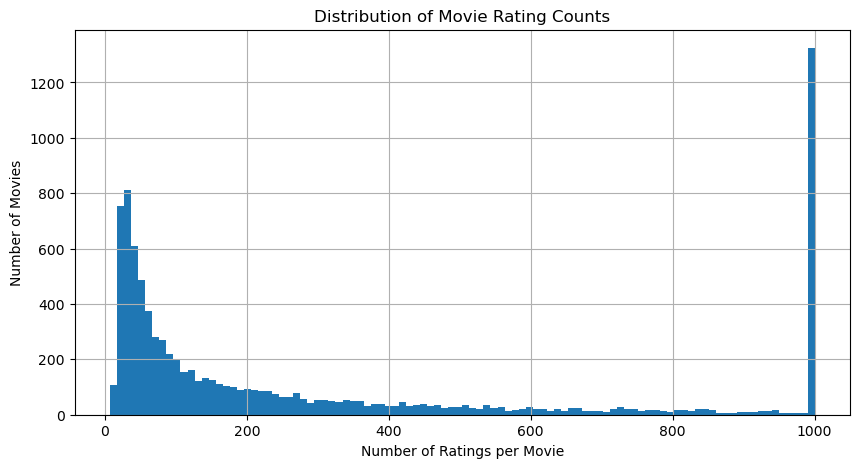

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
movie_counts.hist(bins=100)
plt.title("Distribution of Movie Rating Counts")
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Number of Movies")
plt.show()


In [45]:
movie_counts = df_sample['movieId'].value_counts()
top_10_most_rated_ids = movie_counts.head(10).index

top_10_most_rated = df_sample[df_sample['movieId'].isin(top_10_most_rated_ids)]
top_10_most_rated = top_10_most_rated.groupby(['movieId', 'title']).size().reset_index(name='num_ratings')
top_10_most_rated = top_10_most_rated.sort_values('num_ratings', ascending=False)

print("Top 10 Most Rated Movies:")
print(top_10_most_rated)


Top 10 Most Rated Movies:
   movieId                                              title  num_ratings
0        1                                   Toy Story (1995)         1000
1     5254                                    Blade II (2002)         1000
2     5266                                  Panic Room (2002)         1000
3     5293                              Changing Lanes (2002)         1000
4     5299                    My Big Fat Greek Wedding (2002)         1000
5     5313                           The Scorpion King (2002)         1000
6     5349                                  Spider-Man (2002)         1000
7     5377                                 About a Boy (2002)         1000
8     5378  Star Wars: Episode II - Attack of the Clones (...         1000
9     5400                       Sum of All Fears, The (2002)         1000


In [46]:
# Reverse sorted rating counts
bottom_10_least_rated_ids = movie_counts.sort_values().head(10).index

bottom_10_least_rated = df_sample[df_sample['movieId'].isin(bottom_10_least_rated_ids)]
bottom_10_least_rated = bottom_10_least_rated.groupby(['movieId', 'title']).size().reset_index(name='num_ratings')
bottom_10_least_rated = bottom_10_least_rated.sort_values('num_ratings')

print("\nTop 10 Least Rated Movies:")
print(bottom_10_least_rated)



Top 10 Least Rated Movies:
   movieId                                              title  num_ratings
7     2129  Saltmen of Tibet, The (Salzmänner von Tibet, D...            7
6     2063          Seventh Heaven (Septième ciel, Le) (1997)            8
0      843                                  Lotto Land (1995)            9
4      989          Brother of Sleep (Schlafes Bruder) (1995)            9
5     1555         To Have, or Not (En avoir (ou pas)) (1995)            9
8     2768                            Stiff Upper Lips (1998)            9
1      856                             Mille bolle blu (1993)           10
2      868                          Death in Brunswick (1991)           10
3      871                                Lover's Knot (1996)           10
9     2831                           A Dog of Flanders (1999)           10


In [47]:
movie_counts = df_sample['movieId'].value_counts()
eligible_movies = movie_counts[movie_counts >= 30].index

df_sample = df_sample[df_sample['movieId'].isin(eligible_movies)].copy()


In [48]:
print("Movies with ≥30 ratings:", len(eligible_movies))
print("Remaining ratings in df_sample:", len(df_sample))
print("Remaining users:", df_sample['userId'].nunique())


Movies with ≥30 ratings: 7806
Remaining ratings in df_sample: 2746940
Remaining users: 10000


In [49]:
# Keep only valid tmdbIds
valid_tmdb_ids2 = set(extra_values['tmdbId'])
df_sample = df_sample[df_sample['tmdbId'].isin(valid_tmdb_ids2)].copy()

In [50]:
def half_split(df, min_liked=10, test_frac=0.5, random_state=42):
    train = []
    test = []

    for user_id, group in df.groupby('userId'):
        liked = group[group['rating'] >= 4.0]
        if len(liked) < min_liked:
            continue

        test_sample = liked.sample(frac=test_frac, random_state=random_state)
        train_sample = liked.drop(test_sample.index)

        train.append(train_sample)
        test.append(test_sample)

    return pd.concat(train), pd.concat(test)



In [51]:
df_train, df_test = half_split(df_sample)


In [52]:
# Create maps
movieId_to_tmdbId = df_train.drop_duplicates('movieId').set_index('movieId')['tmdbId'].to_dict()
tmdbId_to_movieId = df_train.drop_duplicates('tmdbId').set_index('tmdbId')['movieId'].to_dict()


# Merge genres into extra_values
genres = df_train[['tmdbId', 'genres']].drop_duplicates()
extra_values = extra_values.merge(genres, on='tmdbId', how='left')



In [53]:
extra_values

,tmdbId,director,actor1,actor2,actor3,description,poster_url,title,genres
0,14070,A.R. Murugadoss,Aamir Khan,Asin Thottumkal,Jiah Khan,A man suffering from anterograde amnesia as a ...,https://image.tmdb.org/t/p/w500/cPLzHxPFRjzNvo...,Ghajini,Action|Romance|Thriller
1,10440,Woody Allen,Woody Allen,Diane Keaton,Jerry Adler,A middle-aged couple suspects foul play when t...,https://image.tmdb.org/t/p/w500/axriUXXcBVZMZT...,Manhattan Murder Mystery,Comedy|Mystery
2,14164,James Wong,Justin Chatwin,Chow Yun-Fat,Joon Park,"On his 18th birthday, Goku receives a mystical...",https://image.tmdb.org/t/p/w500/ztlqrY7VgFIFmt...,Dragonball Evolution,Action|Adventure|Fantasy|Sci-Fi
3,2114,Hironobu Sakaguchi,Ming-Na Wen,Alec Baldwin,Ving Rhames,"Led by a strange dream, scientist Aki Ross str...",https://image.tmdb.org/t/p/w500/phYEy6Am7vRlr9...,Final Fantasy: The Spirits Within,Adventure|Animation|Fantasy|Sci-Fi
4,41651,Rachel Talalay,Karen Allen,Wil Horneff,Chris Mulkey,"After a freak, fatal accident, the soul Karl—a...",https://image.tmdb.org/t/p/w500/lyUZFIQj4CekCt...,Ghost in the Machine,NaN
...,...,...,...,...,...,...,...,...,...
8933,298618,Andy Muschietti,Ezra Miller,Sasha Calle,Michael Keaton,When his attempt to save his family inadverten...,https://image.tmdb.org/t/p/w500/rktDFPbfHfUbAr...,The Flash,Action|Adventure|Sci-Fi
8934,976573,Peter Sohn,Leah Lewis,Mamoudou Athie,Ronnie del Carmen,"In a city where fire, water, land and air resi...",https://image.tmdb.org/t/p/w500/4Y1WNkd88JXmGf...,Elemental,Animation|Children|Comedy|Fantasy|Romance
8935,649609,Chris McKay,Nicholas Hoult,Nicolas Cage,Awkwafina,Having grown sick and tired of his centuries a...,https://image.tmdb.org/t/p/w500/p6yUjhvNGQpFZi...,Renfield,Action|Comedy|Horror
8936,569094,Kemp Powers,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,"After reuniting with Gwen Stacy, Brooklyn’s fu...",https://image.tmdb.org/t/p/w500/8Vt6mWEReuy4Of...,Spider-Man: Across the Spider-Verse,Action|Adventure|Animation|Sci-Fi


In [54]:
# Clean genre strings
extra_values['genres'] = extra_values['genres'].fillna("").astype(str).str.replace(r'[\[\]\']', '', regex=True)

# Merge movieId from tmdbId
extra_values['movieId'] = extra_values['tmdbId'].map(tmdbId_to_movieId)

In [55]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Cleaning functions ---
def clean_description(desc):
    desc = str(desc).lower()
    desc = re.sub(r"[^a-z0-9\s]", "", desc)
    desc = re.sub(r"\s+", " ", desc)
    return desc.strip()


In [56]:
def clean_title(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9 ]', '', text)
    return text.strip()


In [57]:
def clean_name(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [58]:
def clean_genres(genres_str):
    text = re.sub(r'[\[\]\'\"]', '', str(genres_str)).lower()
    text = text.replace(',', ' ')
    return text.strip()



In [59]:
# --- Apply cleaning ---
extra_values['title'] = extra_values['title'].fillna('').apply(clean_title)
extra_values['description'] = extra_values['description'].fillna('').apply(clean_description)
extra_values['genres'] = extra_values['genres'].fillna('').apply(clean_genres)

In [60]:
for col in ['director', 'actor1', 'actor2', 'actor3']:
    extra_values[col] = extra_values[col].fillna('').apply(clean_name)

In [61]:
# Ensure you’ve already run this function
def create_text_soup(row):
    return ' '.join([
        (row['title'] + ' ') * 3,
        (row['genres'] + ' ') * 3,
        (row['director'] + ' ') * 2,
        row['description'],
        (row['actor1'] + ' ') * 2,
        row['actor2'],
        row['actor3']
    ])

# Filter extra_values for training set movies
shared_tmdb_ids = df_train['tmdbId'].unique()
extra_values_filtered = extra_values[extra_values['tmdbId'].isin(shared_tmdb_ids)].drop_duplicates('tmdbId').reset_index(drop=True)

# Create 'text_soup' column
extra_values_filtered['text_soup'] = extra_values_filtered.apply(create_text_soup, axis=1)

# Initialize and fit TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=10000,
    stop_words='english',
    strip_accents='unicode'
)

tfidf_matrix = tfidf_vectorizer.fit_transform(extra_values_filtered['text_soup'])

# Create index: tmdbId -> row index in tfidf_matrix
tfidf_index = pd.Series(extra_values_filtered.index, index=extra_values_filtered['tmdbId']).drop_duplicates()



In [62]:
def get_tfidf_recommendations(tmdb_id, top_n=10):
    if tmdb_id not in tfidf_index:
        return []

    idx = tfidf_index[tmdb_id]
    query_vec = tfidf_matrix[idx]
    similarity = cosine_similarity(query_vec, tfidf_matrix).flatten()
    similar_indices = similarity.argsort()[::-1][1:top_n+1]

    return extra_values_filtered.iloc[similar_indices][['movieId', 'tmdbId', 'title', 'genres', 'director']]


In [63]:
# --- Test: Toy Story ---
toy_story_tmdbid = 862
recommendations = get_tfidf_recommendations(toy_story_tmdbid, top_n=10)
print(recommendations)

       movieId  tmdbId                              title  \
1405    3114.0     863                        toy story 2   
6074   78499.0   10193                        toy story 3   
7161  201588.0  301528                        toy story 4   
6724  115875.0   77887  toy story toons hawaiian vacation   
6426  120474.0  256835         toy story that time forgot   
5876  106022.0  213121                toy story of terror   
7534  166461.0  277834                              moana   
7703  213207.0  508439                             onward   
466     2294.0    8916                               antz   
4577  114552.0  170687                      boxtrolls the   

                                                genres        director  
1405       adventure|animation|children|comedy|fantasy   john lasseter  
6074  adventure|animation|children|comedy|fantasy|imax     lee unkrich  
7161               adventure|animation|children|comedy     josh cooley  
6724       adventure|animation|child

In [64]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler

def train_ease(df, lambda_=10.0, user_map=None, item_map=None, topk=100):
    if user_map is None:
        user_map = {uid: idx for idx, uid in enumerate(df['userId'].unique())}
    if item_map is None:
        item_map = {mid: idx for idx, mid in enumerate(df['movieId'].unique())}

    idx2item = {v: k for k, v in item_map.items()}

    # --- Popularity penalty weights ---
    item_popularity = df['movieId'].value_counts()
    item_weights = 1 / np.sqrt(item_popularity)
    df['ease_weight'] = df['movieId'].map(item_weights)

    rows = df['userId'].map(user_map)
    cols = df['movieId'].map(item_map)
    data = df['ease_weight'].values

    X = sp.csr_matrix((data, (rows, cols)), shape=(len(user_map), len(item_map)))

    G = X.T @ X
    G = G.toarray()
    diag = np.diag_indices_from(G)
    G[diag] += lambda_

    P = np.linalg.inv(G)
    B = P / (-np.diag(P)[:, None])
    B[diag] = 0

    # --- Top-k pruning ---
    if topk is not None:
        for i in range(B.shape[0]):
            row = B[i]
            if np.count_nonzero(row) > topk:
                top_k_idx = np.argpartition(row, -topk)[-topk:]
                mask = np.ones_like(row, dtype=bool)
                mask[top_k_idx] = False
                B[i, mask] = 0.0
        B = csr_matrix(B)

    return B, user_map, item_map, idx2item



# --- Train and score ---
ease_B, ease_user_map, ease_item_map, ease_idx2item = train_ease(df_train, lambda_=1000.0, topk=100)

# Build interaction matrix
rows = df_train['userId'].map(ease_user_map)
cols = df_train['movieId'].map(ease_item_map)
data = df_train['ease_weight'].values
X_train = sp.csr_matrix((data, (rows, cols)), shape=(len(ease_user_map), len(ease_item_map)))

# Predict
ease_all_scores = X_train @ ease_B

# Convert to dense for MinMaxScaler
if sp.issparse(ease_all_scores):
    ease_all_scores = ease_all_scores.toarray()

# Row-wise normalization
scaler = MinMaxScaler()
ease_all_scores = scaler.fit_transform(ease_all_scores)



In [65]:
def get_hybrid_recommendations(user_id, top_n=10, weight_content=0.6):
    scores = {}

    # --- EASE-based scores ---
    if user_id in ease_user_map:
        u_idx = ease_user_map[user_id]
        ease_scores = ease_all_scores[u_idx].copy()  # precomputed + normalized

        # Zero out seen items
        seen_movies = df_train[df_train['userId'] == user_id]['movieId']
        for mid in seen_movies:
            if mid in ease_item_map:
                ease_scores[ease_item_map[mid]] = 0.0

        for idx, score in enumerate(ease_scores):
            movie_id = ease_idx2item[idx]
            tmdb_id = movieId_to_tmdbId.get(movie_id)
            if tmdb_id:
                scores[tmdb_id] = (1 - weight_content) * score

    # --- TF-IDF content-based scores ---
    liked_tmdb_ids = df_train[(df_train['userId'] == user_id) & (df_train['rating'] >= 4.0)]['tmdbId']
    liked_indices = [tfidf_index.get(tmdb_id) for tmdb_id in liked_tmdb_ids if tmdb_id in tfidf_index]

    tfidf_sim = np.zeros(tfidf_matrix.shape[0])

    for idx in liked_indices:
        if idx is not None:
            tfidf_sim += cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    if liked_indices:
        tfidf_sim /= len(liked_indices)
        for idx, score in enumerate(tfidf_sim):
            tmdb_id = extra_values_filtered.iloc[idx]['tmdbId']
            scores[tmdb_id] = scores.get(tmdb_id, 0) + weight_content * score

    # --- Top-N ---
    ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    top_tmdb = [tmdb for tmdb, _ in ranked[:top_n]]

    return top_tmdb



In [66]:
test_user = df_train['userId'].iloc[1]
liked_movies = df_train[(df_train['userId'] == test_user) & (df_train['rating'] >= 4)]
assert not liked_movies.empty

test_tmdb_id = liked_movies['tmdbId'].iloc[1]
recs = get_hybrid_recommendations(user_id=test_user, top_n=10, weight_content=0.6)
print("Hybrid Recommendations for test user:")
print(recs)



Hybrid Recommendations for test user:
[293660, 22538, 9352, 16320, 2649, 49538, 118340, 7512, 2179, 19908]


In [67]:
# Subset 100 unique users
subset_user_ids = df_test['userId'].drop_duplicates().sample(n=100, random_state=42)
df_test_subset = df_test[df_test['userId'].isin(subset_user_ids)]

In [68]:
# Create ground truth: user → set of test tmdbIds
user_test_items = df_test_subset.groupby('userId')['tmdbId'].apply(set).to_dict()

In [69]:
def precision_at_k(recommended_ids, relevant_ids, k=10):
    hits = len(set(recommended_ids[:k]) & relevant_ids)
    return hits / k

In [70]:
weights = [round(w, 2) for w in np.linspace(0.0, 1.0, 11)]
results = []

In [71]:
for w in weights:
    print(f"\nEvaluating weight_content = {w:.2f}")
    precision_scores = []

    for user_id, relevant_tmdb_ids in tqdm(user_test_items.items()):
        rec_ids = get_hybrid_recommendations(user_id, top_n=10, weight_content=w)
        score = precision_at_k(rec_ids, relevant_tmdb_ids, k=10)
        precision_scores.append(score)

    avg_precision = sum(precision_scores) / len(precision_scores)
    print(f"Weight {w:.2f} → Precision@10: {avg_precision:.4f}")
    results.append((w, avg_precision))


Evaluating weight_content = 0.00


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.00 → Precision@10: 0.1640

Evaluating weight_content = 0.10


100%|██████████| 100/100 [00:52<00:00,  1.89it/s]


Weight 0.10 → Precision@10: 0.1630

Evaluating weight_content = 0.20


100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


Weight 0.20 → Precision@10: 0.1640

Evaluating weight_content = 0.30


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.30 → Precision@10: 0.1660

Evaluating weight_content = 0.40


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.40 → Precision@10: 0.1630

Evaluating weight_content = 0.50


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.50 → Precision@10: 0.1690

Evaluating weight_content = 0.60


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.60 → Precision@10: 0.1750

Evaluating weight_content = 0.70


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.70 → Precision@10: 0.1720

Evaluating weight_content = 0.80


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]


Weight 0.80 → Precision@10: 0.1710

Evaluating weight_content = 0.90


100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


Weight 0.90 → Precision@10: 0.1450

Evaluating weight_content = 1.00


100%|██████████| 100/100 [00:52<00:00,  1.90it/s]

Weight 1.00 → Precision@10: 0.0220


In [72]:
from collections import defaultdict

def evaluate_precision_at_k(B, X_train, df_test, user_map, item_map, idx2item, k=10):
    test_user_items = defaultdict(set)
    for _, row in df_test.iterrows():
        uid = user_map.get(row['userId'])
        iid = item_map.get(row['movieId'])
        if uid is not None and iid is not None:
            test_user_items[uid].add(iid)

    scores = X_train @ B  # (users x items), dense

    precision_scores = []
    for user in test_user_items:
        user_scores = scores[user].ravel()  # removed .toarray()
        user_train_items = set(X_train[user].indices)
        user_scores[list(user_train_items)] = -np.inf  # mask train items

        top_k_items = np.argsort(-user_scores)[:k]
        hits = len(set(top_k_items) & test_user_items[user])
        precision_scores.append(hits / k)

    return np.mean(precision_scores)


In [74]:
def train_and_score_ease(df_train, df_test_subset, lambda_, topk, weighting='sqrt'):
    from sklearn.preprocessing import MinMaxScaler

    # --- Build interaction matrix ---
    user_map = {uid: idx for idx, uid in enumerate(df_train['userId'].unique())}
    item_map = {mid: idx for idx, mid in enumerate(df_train['movieId'].unique())}
    idx2item = {v: k for k, v in item_map.items()}

    item_popularity = df_train['movieId'].value_counts()

    # Apply weighting strategy
    if weighting == 'sqrt':
        item_weights = 1 / np.sqrt(item_popularity)
    elif weighting == 'log':
        item_weights = 1 / np.log1p(item_popularity)
    elif weighting == 'raw':
        item_weights = 1 / item_popularity
    elif weighting == 'none':
        item_weights = pd.Series(1.0, index=item_popularity.index)
    else:
        raise ValueError("Unknown weighting scheme")

    df_train['ease_weight'] = df_train['movieId'].map(item_weights)

    rows = df_train['userId'].map(user_map)
    cols = df_train['movieId'].map(item_map)
    data = df_train['ease_weight'].values

    X = sp.csr_matrix((data, (rows, cols)), shape=(len(user_map), len(item_map)))

    G = X.T @ X
    G = G.toarray()
    diag = np.diag_indices_from(G)
    G[diag] += lambda_

    P = np.linalg.inv(G)
    B = P / (-np.diag(P)[:, None])
    B[diag] = 0

    # --- Prune ---
    if topk is not None:
        for i in range(B.shape[0]):
            row = B[i]
            if np.count_nonzero(row) > topk:
                top_k_idx = np.argpartition(row, -topk)[-topk:]
                mask = np.ones_like(row, dtype=bool)
                mask[top_k_idx] = False
                B[i, mask] = 0.0
        B = csr_matrix(B)

    # Predict
    ease_all_scores = X @ B
    if sp.issparse(ease_all_scores):
        ease_all_scores = ease_all_scores.toarray()

    # Normalize
    scaler = MinMaxScaler()
    ease_all_scores = scaler.fit_transform(ease_all_scores)

    # Build ground truth
    user_test_items = df_test_subset.groupby('userId')['tmdbId'].apply(set).to_dict()

    def recommend(user_id, top_n=10):
        if user_id not in user_map:
            return []

        u_idx = user_map[user_id]
        scores = ease_all_scores[u_idx].copy()

        seen = df_train[df_train['userId'] == user_id]['movieId']
        for mid in seen:
            if mid in item_map:
                scores[item_map[mid]] = 0.0

        ranked = np.argsort(scores)[::-1]
        top_movie_ids = [idx2item[i] for i in ranked[:top_n]]
        top_tmdb_ids = [movieId_to_tmdbId[mid] for mid in top_movie_ids if mid in movieId_to_tmdbId]
        return top_tmdb_ids[:top_n]

    # Evaluate
    precision_scores = []
    for user_id, relevant_tmdb in user_test_items.items():
        recs = recommend(user_id)
        hits = len(set(recs) & relevant_tmdb)
        precision_scores.append(hits / 10)

    return np.mean(precision_scores)


In [75]:
from tqdm import tqdm

lambda_values = [10, 100, 1000, 3000]
topk_values = [50, 100, None]
weightings = ['sqrt', 'log', 'raw', 'none']

results = []

for lmbda in lambda_values:
    for topk in topk_values:
        for wgt in weightings:
            print(f"λ={lmbda}, topk={topk}, weighting={wgt}")
            score = train_and_score_ease(df_train, df_test_subset, lambda_=lmbda, topk=topk, weighting=wgt)
            results.append((lmbda, topk, wgt, score))
            print(f" → Precision@10: {score:.4f}")


λ=10, topk=50, weighting=sqrt
 → Precision@10: 0.1310
λ=10, topk=50, weighting=log
 → Precision@10: 0.1680
λ=10, topk=50, weighting=raw
 → Precision@10: 0.0220
λ=10, topk=50, weighting=none
 → Precision@10: 0.1000
λ=10, topk=100, weighting=sqrt
 → Precision@10: 0.1780
λ=10, topk=100, weighting=log
 → Precision@10: 0.1500
λ=10, topk=100, weighting=raw
 → Precision@10: 0.0230
λ=10, topk=100, weighting=none
 → Precision@10: 0.1050
λ=10, topk=None, weighting=sqrt
 → Precision@10: 0.1470
λ=10, topk=None, weighting=log
 → Precision@10: 0.1640
λ=10, topk=None, weighting=raw
 → Precision@10: 0.0540
λ=10, topk=None, weighting=none
 → Precision@10: 0.0850
λ=100, topk=50, weighting=sqrt
 → Precision@10: 0.1510
λ=100, topk=50, weighting=log
 → Precision@10: 0.1570
λ=100, topk=50, weighting=raw
 → Precision@10: 0.0190
λ=100, topk=50, weighting=none
 → Precision@10: 0.1160
λ=100, topk=100, weighting=sqrt
 → Precision@10: 0.1670
λ=100, topk=100, weighting=log
 → Precision@10: 0.1520
λ=100, topk=100, 